##  <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer




**Fake reviews detection**

Machine learning model involved: Binary Classification

Data needed: Reviews on products, customer age, gender, location, tenure, type (prime or not), number of reviews given ,etc.

Benefits to company: Average reviews (ratings) on products could significantly impact consumer's decision. Removing fake reviews could ensure the credibility of reviews and control the fairness of market competition on platforms like Amazon.

**Customer segmentation**

Machine learning model involved: Regression, Clustering

Data needed: customer age, gender, location, type (prime or not), tenure, product seen, product purchased, purchase date, purchase amount, etc.

Benefits to company: By analyzing customer churn using survival analysis, Amazon could cluster customers into different segmentations (e.g. new, active, churn) and increase marketing/adversiting efficiency based on the clustering results.

# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

\begin{equation*}
L(\theta) = \prod_{i=1}^{10}p(t_{i}\mid \theta) = C^{-10} \theta^{-50} \prod_{i=1}^{10}t_{i}^{4} exp(\frac{-\sum_{i=1}^{n}t_{i}}{\theta})\\
\ln L(\theta) = -10\ln C -50\ln \theta + 4\sum_{i=1}^{10}\ln t_{i} - \frac{\sum_{i=1}^{n}t_{i}}{\theta}\\
\frac{\partial}{\partial \theta} \ln L(\theta) = \frac{-50}{\theta} + \frac{\sum_{i=1}^{n}t_{i}}{\theta^{2}} = 0\\
\hat{\theta} = \frac{\sum_{i=1}^{n}t_{i}}{50} = \textbf{0.576}
\end{equation*}

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()

X = boston.data
y = boston.target

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [2]:
X

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

## Answer

### a.

In [2]:
X.shape

(506, 13)

In [3]:
import pandas as pd
print pd.DataFrame(X[:5,:])

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


### b.

In [4]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
print pd.Series(reg.coef_, index = boston.feature_names)

CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64


In [6]:
y_fit = reg.predict(X)
print 'model MSE:', mean_squared_error(y,y_fit)

model MSE: 21.8977792177


### c.

In [7]:
X_train, X_test = X[:400],X[400:]
y_train, y_test = y[:400],y[400:]

In [8]:
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)
y_train_fit = reg2.predict(X_train)
y_pred = reg2.predict(X_test)

In [9]:
print 'in-sample MSE:', mean_squared_error(y_train,y_train_fit)

in-sample MSE: 22.3052255842


In [10]:
print 'out-of-sample MSE:', mean_squared_error(y_test,y_pred)

out-of-sample MSE: 38.1643386432


Out-of-sample MSE is much higher than in-sample MSE, which could be due to non-random selection of training and test datasets or overfitting.

### d.

Populating the interactive namespace from numpy and matplotlib


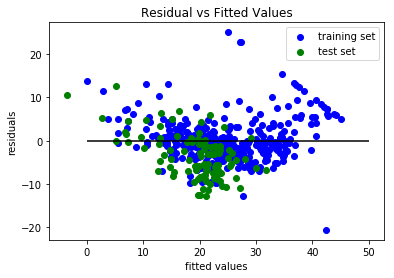

In [11]:
import matplotlib
%pylab inline

plt.scatter(y_train_fit, y_train - y_train_fit, c = 'b', label = 'training set')
plt.scatter(y_pred, y_test - y_pred, c = 'g', label = 'test set')
plt.hlines(y=0,xmin=0,xmax=50)

plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('Residual vs Fitted Values')
plt.legend()


Residule plot above shows that there are strong patterns in residuals for both training and test sets, indicating non-linearity in the data. Hence we need to consider including higher order terms in the MLR model.

### e.

In [12]:
X = np.concatenate((X, np.square(X)), axis=1)
X_train, X_test = X[:400],X[400:]

In [13]:
reg3 = linear_model.LinearRegression()
reg3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_train_fit = reg3.predict(X_train)
y_pred = reg3.predict(X_test)

In [15]:
print 'in-sample MSE:', mean_squared_error(y_train,y_train_fit)

in-sample MSE: 14.4689173781


In [16]:
print 'out-of-sample MSE:', mean_squared_error(y_test,y_pred)

out-of-sample MSE: 32.9465487204


Both values decrease comparing to part c.

# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



### 1)

The size of coefficients on independent variables in linear models depends on the scale of the variable. Ridge and lasso regression shrink the coefficients through the tuning parameter $\lambda$ in order to reduce variance of the model. The effect of regularization would be different when indenpendent variables are on different scales. Hence here we standardize the independent variables before performing ridge and lasso regression.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

In [18]:
from sklearn.model_selection import cross_val_score, KFold
alphas =  10**np.linspace(10,-2,100)*0.5
kf = KFold(n_splits = 5)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
cv_lasso = []

for a in alphas:
    lasso = linear_model.Lasso(alpha=a, max_iter=10000)
    scores = cross_val_score(lasso, X_train_scaled, y_train, cv=kf,scoring = 'neg_mean_squared_error')
    mean_score = -scores.mean()
    cv = (a,mean_score)
    cv_lasso.append(cv)
    
best_lasso = sorted(cv_lasso,key=lambda x: x[1])[0][0]
print 'best lambda for lasso regression:', best_lasso    

best lambda for lasso regression: 0.0152692775442


In [21]:
cv_ridge= []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, max_iter=10000)
    scores = cross_val_score(ridge, X_train_scaled, y_train, cv=kf,scoring = 'neg_mean_squared_error')
    mean_score = -scores.mean()
    cv = (a,mean_score)
    cv_ridge.append(cv)
    
best_ridge = sorted(cv_ridge,key=lambda x: x[1])[0][0]
print 'best lambda for ridge regression:', best_ridge

best lambda for ridge regression: 0.328966612329


### 2)

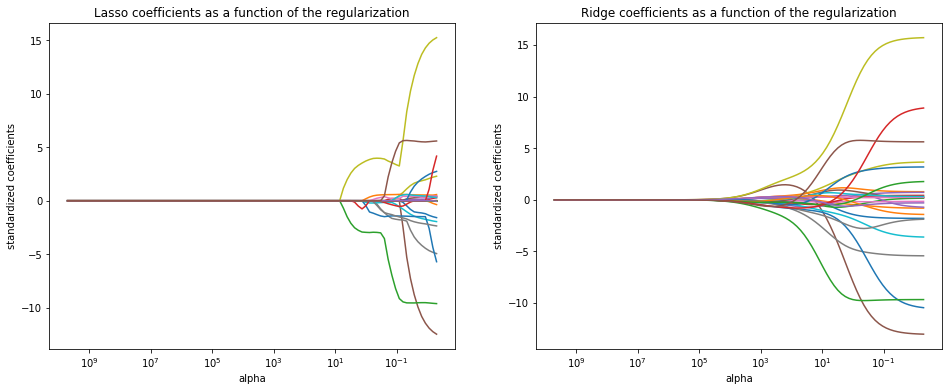

In [22]:
coefs_lasso = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    coefs_lasso.append(lasso.coef_)


coefs_ridge = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, max_iter=10000)
    ridge.fit(X_train_scaled, y_train)
    coefs_ridge.append(ridge.coef_)

fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           figsize=(16, 6))   
ax1.plot(alphas, coefs_lasso)
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()[::-1]) 
ax1.set_xlabel('alpha')
ax1.set_ylabel('standardized coefficients')
ax1.set_title('Lasso coefficients as a function of the regularization')
  
ax2.plot(alphas, coefs_ridge)
ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1]) 
ax2.set_xlabel('alpha')
ax2.set_ylabel('standardized coefficients')
ax2.set_title('Ridge coefficients as a function of the regularization')

As shown in above plots, coefficients tend to increase when regularization parameter (alpha) decreases for both models, as a result of minimizing objective functions.

### 3)

In [23]:
lm = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha = best_lasso, max_iter=10000)
ridge = linear_model.Ridge(alpha = best_ridge, max_iter=10000)

lm.fit(X_train,y_train)
lasso.fit(X_train_scaled,y_train)
ridge.fit(X_train_scaled,y_train)

y_pred_lm = lm.predict(X_test)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

print 'least squares regression prediction error (MSE):', mean_squared_error(y_test,y_pred_lm)
print 'lasso regression prediction error (MSE):', mean_squared_error(y_test,y_pred_lasso)
print 'ridge regression prediction error (MSE):', mean_squared_error(y_test,y_pred_ridge)

least squares regression prediction error (MSE): 17.2979743299
lasso regression prediction error (MSE): 18.6227203068
ridge regression prediction error (MSE): 17.6357585532


### 4)

In [24]:
lasso = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [25]:
print 'best lambda for lasso regression (with lassocv):', lasso.alpha_ 

best lambda for lasso regression (with lassocv): 0.01610453948


In [26]:
feature_names = np.append(boston.feature_names,['{}^2'.format(feature) for feature in boston.feature_names])
print pd.Series(lasso.coef_, index = feature_names)

CRIM         -1.135432
ZN           -0.000000
INDUS         0.000000
CHAS          0.088149
NOX          -0.000000
RM          -10.660189
AGE           0.000000
DIS          -4.111065
RAD           1.850287
TAX          -1.646562
PTRATIO      -1.485745
B             0.540134
LSTAT        -9.524496
CRIM^2        0.000000
ZN^2          0.144612
INDUS^2       0.338670
CHAS^2        0.321665
NOX^2        -2.104704
RM^2         13.523237
AGE^2         0.461298
DIS^2         1.986235
RAD^2         0.000000
TAX^2        -0.000000
PTRATIO^2     0.000000
B^2          -0.000000
LSTAT^2       5.509076
dtype: float64


Out of 26 predictors, only 17 have non-zero coefficients as a result of regularization from Lasso regression. 4 of the first order term and 5 of the Most of the coefficents are shrinked to zero in order to minimize the objective function. 

# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer



1. When there are only linear relationships between independent variables and dependent variables, interaction terms will not be significant, hence simpler model (with only linear terms) would be preferred.

2. When dimension of predictors is large, including interaction terms for all predictors will dramatically increase the dimension, which might lead to over-fitting problem. 
